In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetescsv/diabetes.csv


In [44]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [45]:
df = pd.read_csv('../input/diabetescsv/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
# Eye ball the imported dataset
df.info()

# Take away : No missing values. All dimesions are numerics. So, no conversion required.
# However, there are 0 values for Glucose, BllodPressure, SkinThickness, Insulin, BMI , Which cannot be correct. So, needs to 
# be treated.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
df.shape # print dimension

(768, 9)

In [48]:
df.Outcome.value_counts() # there are more data points for non-diabetics compared to diabetics,model which will be trained 
# using this data ideally it should be good in predicting the non-diabetics patients first.

0    500
1    268
Name: Outcome, dtype: int64

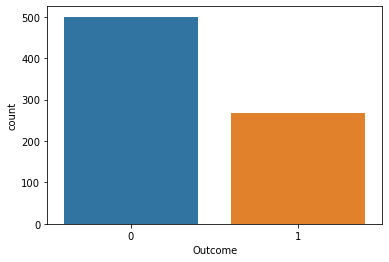

In [49]:
sns.countplot(x='Outcome' , data =df);

Out of 768 data points, 500 are labeled as 0 and 268 as 1.
Outcome 0 means No diabetes, outcome 1 means diabetes

In [50]:
# Check data types of dataset

df.dtypes # all data types are numeric. So, encoding is needed.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [51]:
df.describe()

#There are incorrect values i.e.0's in Glucose, BloodPressure, SkinThickness, Insulin, BMI. 
# replacing 0 with median of corresponding column.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
dataframe_temp = df.drop(["Pregnancies","Outcome"],axis = 1)
dataframe_temp
medians = dataframe_temp.median()
print("medians",medians)
dataframe_nonzero = dataframe_temp.replace(0,medians)
dataframe_nonzero["Pregnancies"] = df["Pregnancies"]
dataframe_nonzero["Outcome"] = df["Outcome"]
dataframe_nonzero

medians Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148,72,35,30.5,33.6,0.627,50,6,1
1,85,66,29,30.5,26.6,0.351,31,1,0
2,183,64,23,30.5,23.3,0.672,32,8,1
3,89,66,23,94.0,28.1,0.167,21,1,0
4,137,40,35,168.0,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180.0,32.9,0.171,63,10,0
764,122,70,27,30.5,36.8,0.340,27,2,0
765,121,72,23,112.0,26.2,0.245,30,5,0
766,126,60,23,30.5,30.1,0.349,47,1,1


In [53]:
corr = dataframe_nonzero.corr()
corr

# Takeaway : outcome is positively corelated to Glucose feature.
# Age & no. of pregencies have positive corelation.
# BMI & Skin thickness has positive corelation
# No other strong negetive corelation is observed.

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
Outcome,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


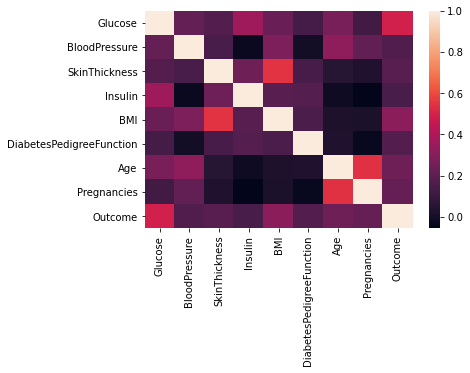

In [54]:
sns.heatmap(corr)

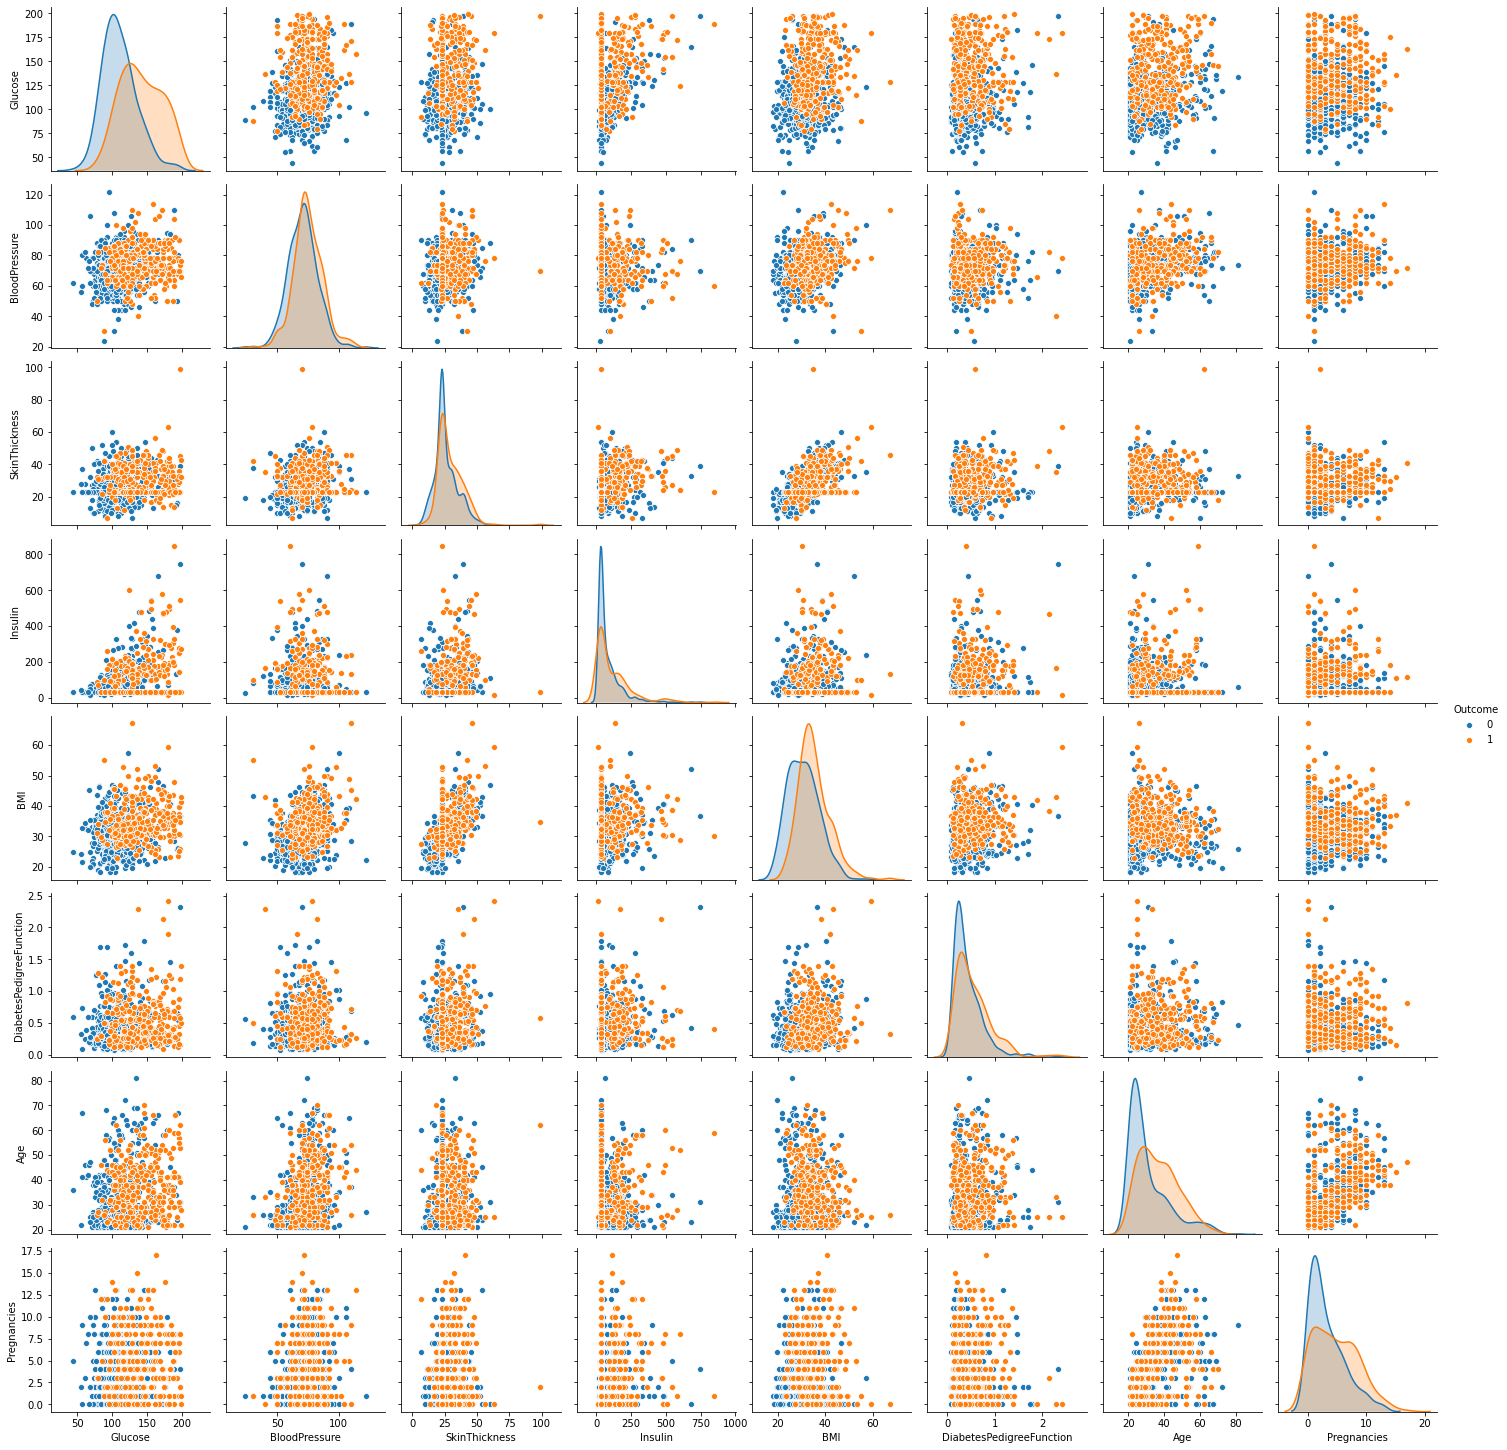

In [55]:
sns.pairplot(dataframe_nonzero, diag_kind='kde', hue="Outcome") # plotting pairplot

In [56]:
from sklearn.model_selection import train_test_split
X = dataframe_nonzero.drop('Outcome', axis=1)
Y = dataframe_nonzero['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

Training Support vector Machines

In [57]:
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVC(C = 100,gamma= "scale")
clf.fit(X_train,Y_train)

SVC(C=100)

In [58]:
score1 = clf.score(X_test,Y_test)
score1

0.7705627705627706

In [59]:
from sklearn import metrics
Y_pred = clf.predict(X_test)  
print( metrics.confusion_matrix(Y_test,Y_pred))

[[131  15]
 [ 38  47]]


Scaling the datapoints using MinMax Scalar

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Zscore
from scipy.stats import zscore 
X_train_z = X_train.apply(zscore) # converting to Z score
X_test_z = X_test.apply(zscore)

In [61]:
# Model score on Minmax scaled values
clf = svm.SVC(C = 10,gamma= "scale")
clf.fit(X_train_scaled,Y_train)
score2 = clf.score(X_test_scaled,Y_test)
score2

0.7532467532467533

In [62]:
# Model score using zscore  values
clf = svm.SVC(C = 10,gamma= "scale")
clf.fit(X_train_z,Y_train)
score3 = clf.score(X_test_z,Y_test)
score3

0.7272727272727273

we can try increasing either C or gamma to fit a more complex model.

In [63]:
clf = svm.SVC(C = 1000,gamma= "scale")
clf.fit(X_train,Y_train)
score4 = clf.score(X_test,Y_test)
print("Model score for non-scaled datapoints", score4)

# model accuracy has increased on non-scaled data,however for scaled values with c = 1000, model accuracy is decreasing.

Model score for non-scaled datapoints 0.7835497835497836


In [64]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [66]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [67]:
gs.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5,
                                3.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [68]:
gs.best_estimator_

SVC(kernel='linear')

In [69]:
gs.best_score_

0.7653738644304683

Calculate AUC score and plot ROC curve

In [70]:
from sklearn.metrics import roc_auc_score,roc_curve

In [71]:
auc = roc_auc_score(Y_test,Y_pred)
print("AUC %0.3f" %auc)

AUC 0.725


 AUC measures how true positive rate (recall) and false positive rate trade off 

In [74]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [76]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
results = []
names = []
scoring = 'accuracy'
import warnings
warnings.filterwarnings("ignore")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train,
cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.763347 (0.061653)
LDA: 0.770790 (0.062164)
KNN: 0.696261 (0.085826)
CART: 0.702027 (0.044789)
NB: 0.730119 (0.054511)
SVM: 0.744794 (0.054232)
RFC: 0.739133 (0.055761)


Linear Discriminant Analysis is giving a better accuracy of 77% as compared with the other models.